## Практическая работа №1
Этот набор данных состоит из различных списков домов в Лондоне и соседних городах.

### Описание исходных данных

1. Unnamed: 0. 
2. Property Name  
3. Price
4. House Type - Contains one of the following types of houses (House, Flat/Apartment, New Development, Duplex, Penthouse, Studio, Bungalow, Mews)
5. Area in sq ft
6. No. of Bedrooms
7. No. of Bathrooms
8. No. of Receptions
9. Location
10. City/County - Includes London, Essex, Middlesex, Hertfordshire, Kent, and Surrey.
11. Postal Code

Ссылка на исходный датасет: https://www.kaggle.com/datasets/arnavkulkarni/housing-prices-in-london

Для начала импортирую все необходимые библиотеки, которые понадобятся при написании кода, и открываю файл в формате csv.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt


houses = pd.read_csv('/Users/alinakovalenko/Downloads/London.csv')
houses

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...,...
3475,3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


Для начала немного преобразуем датасет. Переменная Unnamed: 0 не несет новой информации, так как повторяет номер индекса, который Python присваивает строке, поэтому удаляю данную колонку из всего датасета с помощью метода drop.

In [2]:
houses = houses.drop('Unnamed: 0', axis = 1)

In [3]:
houses

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...
3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


Далее работаю с названиями переменных. Переименовываю все переменные на русский язык.

In [4]:
houses = houses.rename(columns = {'Property Name':'Улица', 'Price':'Стоимость','House Type':'Тип проживания','Area in sq ft':'Площадь в квадратных футах','No. of Bedrooms':'Количество спален', 'No. of Bathrooms':'Количество ванных','No. of Receptions':'Количество комнат для гостей','Location':'Район','City/County':'Город','Postal Code':'Почтовый индекс'})

Далее работаю с пропущенными значениями. Выявляю, в каких переменных они есть с помощью метода isna.

In [5]:
houses.isna().sum()

Улица                             0
Стоимость                         0
Тип проживания                    0
Площадь в квадратных футах        0
Количество спален                 0
Количество ванных                 0
Количество комнат для гостей      0
Район                           962
Город                             0
Почтовый индекс                   0
dtype: int64

Пропущенные значения есть в переменной "Район". Проверяю, могу ли я что-то сделать с данной переменной, и смотрю ее тип с помощью метода info.

In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Улица                         3480 non-null   object
 1   Стоимость                     3480 non-null   int64 
 2   Тип проживания                3480 non-null   object
 3   Площадь в квадратных футах    3480 non-null   int64 
 4   Количество спален             3480 non-null   int64 
 5   Количество ванных             3480 non-null   int64 
 6   Количество комнат для гостей  3480 non-null   int64 
 7   Район                         2518 non-null   object
 8   Город                         3480 non-null   object
 9   Почтовый индекс               3480 non-null   object
dtypes: int64(5), object(5)
memory usage: 272.0+ KB


Поскольку тип переменной object - строка, то восставновить пропущенные значения не получится. Удаляю строчки, в которых есть пропущенные значения, с помощью метода dropna.

In [7]:
houses = houses.dropna(subset=['Район'])

In [8]:
houses

,Улица,Стоимость,Тип проживания,Площадь в квадратных футах,Количество спален,Количество ванных,Количество комнат для гостей,Район,Город,Почтовый индекс
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...
3473,Park Lane,19950000,Flat / Apartment,3698,5,5,5,Mayfair,London,W1K 7AJ
3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


Допустим, я перезжаю в Лондон и хочу выбрать вариант проживания, однако не знаю, какие варианты вообще есть. Использую метод unique, чтобы посмотреть варианты.

In [9]:
houses['Тип проживания'].unique() 

array(['House', 'Flat / Apartment', 'New development', 'Penthouse',
       'Studio', 'Bungalow', 'Duplex', 'Mews'], dtype=object)

Просмотрев варианты, определяюсь, что хочу жить в доме. Из дополнительных предпочтений - это должен быть дом, площадью более 3000 квадратных футов, и в котором будет 3 и более спален в районе Mayfair по самой дешёвой стоимости. Найду такие варианты, используя фильтрацию.

In [10]:
houses[(houses['Тип проживания'] == 'House') & (houses['Площадь в квадратных футах'] >= 3000) & (houses['Количество спален'] >= 3) & (houses['Город'] == 'London')]

,Улица,Стоимость,Тип проживания,Площадь в квадратных футах,Количество спален,Количество ванных,Количество комнат для гостей,Район,Город,Почтовый индекс
15,Chester Terrace,12500000,House,4596,6,6,6,Regents Park,London,NW1 4ND
21,Devonshire Close,5500000,House,3016,4,4,4,Marylebone,London,W1G 7BA
43,Old Battersea House,9975000,House,10100,10,10,10,Battersea,London,SW11 3LD
69,Queens Grove,7500000,House,3851,6,6,6,St John's Wood,London,NW8 6EN
95,Baronsmead Road,4000000,House,3714,5,5,5,Barnes,London,SW13 9RR
...,...,...,...,...,...,...,...,...,...,...
3461,Redington Road,6950000,House,3988,3,3,3,Hampstead,London,NW3 7RG
3465,Ironmonger Lane,4300000,House,3660,4,4,4,The City,London,EC2V 8EY
3469,Hamilton Terrace,8250000,House,3940,5,5,5,St. John's Wood,London,NW8 9RE
3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG


Поскольку меня интересует самый дешевый вариант размешения, отсортирую данные значения по возрастанию с помощью метода sort_values. Для удобства создам новую переменную, к которой буду применять сортировку.

In [11]:
houses_sort = houses[(houses['Тип проживания'] == 'House') & (houses['Площадь в квадратных футах'] >= 3000) & (houses['Количество спален'] >= 3) & (houses['Город'] == 'London')]

In [12]:
houses_sort.sort_values(by=['Стоимость'])

,Улица,Стоимость,Тип проживания,Площадь в квадратных футах,Количество спален,Количество ванных,Количество комнат для гостей,Район,Город,Почтовый индекс
1524,Werter Road,1695000,House,3235,6,6,6,Putney,London,SW15 2LJ
2562,Sutton Court Road,1775000,House,3143,6,6,6,Chiswick,London,W4 3EQ
1311,Worple Street,1800000,House,4225,5,5,5,Mortlake,London,SW14 8HE
888,Langside Avenue,1995000,House,3256,5,5,5,Putney,London,SW15 5QT
1411,Pepys Road,2295000,House,4569,5,5,5,Wimbledon,London,SW20 8NP
...,...,...,...,...,...,...,...,...,...,...
353,Upper Grosvenor Street,18000000,House,8315,7,7,7,Mayfair,London,W1K 2NP
3251,Harley Street,18500000,House,8603,6,6,6,Marylebone,London,W1G 6BF
3299,Wilton Crescent & Kinnerton Street,19000000,House,6796,7,7,7,Belgravia,London,SW1X 8RN
3420,Hamilton Terrace,25000000,House,12435,5,5,5,St Johns Wood,London,NW8 9UJ


Получилось, что при заданных условиях, стоимость самого дешевого дома равна 1 695 000 фунтов.

Возвращаюсь к оценке всего датасета и хочу создать новую категориальную переменную на основе количественной. Запишу функцию с помощью метода def и буду считать, что стоимость на жилища в Лондоне распределяется следующим образом:

In [13]:
def get_price_cat(price):
    if price < 500000:
        return 'Low price'
    elif price < 1000000:
        return 'Middle price'
    elif price < 5000000:
        return 'Premium price'
    elif price >= 5000000:
        return 'Luxury price'
    else:
        return price

Далее создам новую переменную "Категориальная стоимость" и присвою ей функцию.

In [14]:
houses['Категориальная стоимость'] = houses['Стоимость'].apply(get_price_cat)

Далее присвою новой переменной "Категориальная стоимость" тип категориальной. Category позволяет хранить и запись в строковом виде, который понятен людям, и объект, в котором все эти категории закодированы числами.

In [15]:
houses['Категориальная стоимость'] = pd.Categorical(houses['Категориальная стоимость'])

Вывод списка категорий:

In [16]:
houses['Категориальная стоимость'].cat.categories

Index(['Low price', 'Luxury price', 'Middle price', 'Premium price'], dtype='object')

Теперь создам бинарную переменную, которая будет закодирована целыми числами 0 и 1. Бинарной переменной станет новая переменная "Идельное место проживания", которому должны подходить такие типы размещения, где общая площадь больше 5000 квадратных футов, стоимость на уровне premium price, есть более 5 спален, 5 ванных комнат и 5 комнат для гостей. Создам данную переменную с помощью функции where.

In [17]:
houses['Идеальное место проживания'] = np.where((houses['Категориальная стоимость'] == 'Premium price') &
         (houses['Площадь в квадратных футах'] >= 5000) &
         (houses['Количество спален'] >= 5) &
         (houses['Количество ванных'] >= 5) &
         (houses['Количество комнат для гостей'] >= 5), 1, 0)

Посчитаем количество полученных наблюдений с помощью метода sum.

In [18]:
houses['Идеальное место проживания'].sum()

46

Далее я хочу узнать, сколько вариантов размещения есть для каждого ценового уровня. Группирую переменные с помощью groupby так, чтобы для каждого ценового уровня в ранжированном порядке показало количество типов размещения. 

In [19]:
houses.groupby('Категориальная стоимость')['Тип проживания'].value_counts()

Категориальная стоимость  Тип проживания  
Low price                 Flat / Apartment    161
                          New development      18
                          Studio                7
                          House                 5
                          Penthouse             2
Luxury price              House                65
                          New development      30
                          Flat / Apartment     28
                          Penthouse            14
Middle price              Flat / Apartment    548
                          House               150
                          New development     130
                          Penthouse            17
                          Bungalow              7
                          Duplex                3
Premium price             House               785
                          Flat / Apartment    366
                          New development     128
                          Penthouse            49
       

Теперь хочу рассчитать меры центральной тенденции для площади в квадратных футах. Поскольку площадь жилого помещения значительно разнится от его типа, то я рассчитаю такие меры центральной тенденции, как среднее значение и медиана, не просто по площади в целом, а по отдельной площади для каждого типа размещения. Для этого использую метод groupby.

In [20]:
houses.groupby('Тип проживания')['Площадь в квадратных футах'].mean()

Тип проживания
Bungalow            1711.000000
Duplex              1211.500000
Flat / Apartment    1027.313690
House               2659.356219
Mews                1280.500000
New development     1526.009804
Penthouse           1837.195122
Studio               390.571429
Name: Площадь в квадратных футах, dtype: float64

In [21]:
houses.groupby('Тип проживания')['Площадь в квадратных футах'].median()

Тип проживания
Bungalow            1459.0
Duplex               966.0
Flat / Apartment     893.0
House               2247.0
Mews                1280.5
New development     1002.0
Penthouse           1557.0
Studio               381.0
Name: Площадь в квадратных футах, dtype: float64

Так как значения площади значительно разбросаны, и почти невозможно высчитать моду для каждого отдельного типа проживания, то моду я считаю для всей площади в квадратных футах в целом с помощью метода value_counts.

In [22]:
houses['Площадь в квадратных футах'].value_counts()

960      8
1023     7
767      6
848      6
693      6
        ..
12526    1
1898     1
3391     1
655      1
5395     1
Name: Площадь в квадратных футах, Length: 1694, dtype: int64

Следовательно, модальной площадью является значение 960 квадратных футов.

Для наглядности мы можем посмотреть на распределение, например, среднего на графике в виде столбчатой диаграммы с помощью функции plot.

<AxesSubplot:xlabel='Тип проживания'>

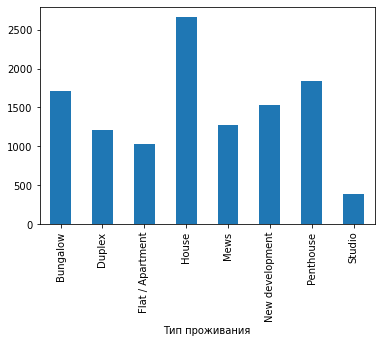

In [23]:
houses.groupby('Тип проживания')['Площадь в квадратных футах'].mean().plot(kind='bar')

Согласно графику, наибольшая средняя площадь наблюдается у частного дома.

Также для удобства и наглядности я могу сгруппировать результаты вычислений средней и медианной площади в квадратных футах в одну таблицу с помощью метода "Пивотальная таблица".

In [24]:
houses.pivot_table(index='Тип проживания', 
                  values='Площадь в квадратных футах',
                  aggfunc=['mean', 'median'])

,mean,median
,Площадь в квадратных футах,Площадь в квадратных футах
Тип проживания,,
Bungalow,1711.000000,1459.0
Duplex,1211.500000,966.0
Flat / Apartment,1027.313690,893.0
House,2659.356219,2247.0
Mews,1280.500000,1280.5
New development,1526.009804,1002.0
Penthouse,1837.195122,1557.0
Studio,390.571429,381.0


Далее для той же перемннной "Площадь в квадратных футах" рассчитаю такие меры разброса, как размах, интерквартильный размах, дисперсия и среднеквадратичное отклонение. 
Так как данные меры для выбранной переменной также значительно отличаются от типа проживания, то буду группировать площадь по типу проживания с помощью groupby. Для наглядности сразу представлю пивотальную таблицу, в которой будут рассчитаны все перечисленные меры разброса.

Для того, чтобы посчитать размах для каждого типа размещения по площади, создам функцию с помощью def.

In [25]:
def range_values(x):
    return x.max() - x.min()

Создам также функцию для подсчета интерквартильного размаха.

In [26]:
def quantile_range_values(x):
    return x.quantile(0.75) - x.quantile(0.25) 

А теперь сгруппирую все в единую пивотальную таблицу.

In [27]:
houses.pivot_table(index= 'Тип проживания', 
                  values= 'Площадь в квадратных футах',
                  aggfunc= [range_values, quantile_range_values, 'var', 'std'])

,range_values,quantile_range_values,var,std
,Площадь в квадратных футах,Площадь в квадратных футах,Площадь в квадратных футах,Площадь в квадратных футах
Тип проживания,,,,
Bungalow,2338,899.00,6.631922e+05,814.366165
Duplex,1134,322.50,2.951370e+05,543.265129
Flat / Apartment,4232,524.50,2.782226e+05,527.468148
House,13820,1460.00,2.721134e+06,1649.586095
Mews,575,287.50,1.653125e+05,406.586399
New development,15043,867.50,2.836082e+06,1684.066995
Penthouse,5003,1072.75,1.089625e+06,1043.851054
Studio,186,79.50,4.400619e+03,66.337162


В дополнение стоит также сказать, что для того, чтобы посмотреть различные показатели для количественных переменных всего датасета или его определенной выбранной части, можно воспользоваться методом describe.

In [28]:
houses.groupby('Тип проживания')['Площадь в квадратных футах'].describe()

,count,mean,std,min,25%,50%,75%,max
Тип проживания,,,,,,,,
Bungalow,9.0,1711.000000,814.366165,583.0,1270.00,1459.0,2169.00,2921.0
Duplex,4.0,1211.500000,543.265129,890.0,927.50,966.0,1250.00,2024.0
Flat / Apartment,1103.0,1027.313690,527.468148,274.0,677.50,893.0,1202.00,4506.0
House,1005.0,2659.356219,1649.586095,538.0,1674.00,2247.0,3134.00,14358.0
Mews,2.0,1280.500000,406.586399,993.0,1136.75,1280.5,1424.25,1568.0
New development,306.0,1526.009804,1684.066995,362.0,756.50,1002.0,1624.00,15405.0
Penthouse,82.0,1837.195122,1043.851054,414.0,1152.50,1557.0,2225.25,5417.0
Studio,7.0,390.571429,66.337162,328.0,338.00,381.0,417.50,514.0


Далее проведу z-оценку, в рамках которой проверяется на сколько среднеквадратичных отклонений отклоняется значение. Поскольку для разных типов размещения средняя площадь в квадратных футах своя, то рассчитаю z-оценку для каждого типа проживания отдельно.

In [29]:
z_score_1 = scipy.stats.zscore(houses[houses['Тип проживания'] == 'Bungalow']['Площадь в квадратных футах'])

In [30]:
z_score_2 = scipy.stats.zscore(houses[houses['Тип проживания'] == 'Duplex']['Площадь в квадратных футах'])

In [31]:
z_score_3 = scipy.stats.zscore(houses[houses['Тип проживания'] == 'Flat / Apartment']['Площадь в квадратных футах'])

In [32]:
z_score_4 = scipy.stats.zscore(houses[houses['Тип проживания'] == 'House']['Площадь в квадратных футах'])

In [33]:
z_score_5 = scipy.stats.zscore(houses[houses['Тип проживания'] == 'Mews']['Площадь в квадратных футах'])

In [34]:
z_score_6= scipy.stats.zscore(houses[houses['Тип проживания'] == 'New development']['Площадь в квадратных футах'])

In [35]:
z_score_7 = scipy.stats.zscore(houses[houses['Тип проживания'] == 'Penthouse']['Площадь в квадратных футах'])

In [36]:
z_score_8 = scipy.stats.zscore(houses[houses['Тип проживания'] == 'Studio']['Площадь в квадратных футах'])

С помощью функции concat объединю все z-оценки по разным типам проживания в одну колонку и добавлю ее в датасет.

In [37]:
houses['z_score'] = pd.concat([z_score_1, z_score_2, z_score_3, z_score_4, z_score_5, z_score_6, z_score_7, z_score_8])

Теперь проверю, если ли значения, которые являются выбросами. Согласно методу z-оценки, выбросами являются значения, которые откроняются от среднего больше, чем на 3 среднеквадратичных отклонения. Сначала проверю левую сторону:

In [38]:
houses[houses['z_score'] < -3].shape

(0, 13)

Следовательно, с левой стороны выбросов нет. Проверяю левую сторону:

In [39]:
houses[houses['z_score'] > 3].shape

(51, 13)

С правой стороны 51 наблюдение можно считать выбросами, поскольку отклоняется от среднего более, чем на 3 среднеквадратичных отклонения. Распределение будет смещено влево, убедимся в этом, построив график.

<AxesSubplot:>

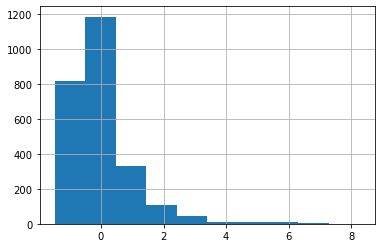

In [40]:
houses['z_score'].hist()

Далее найду среднюю стоимость за квадратный фут по всем типам проживания вместе. Как показала z-оценка, у переменной "Площадь в квадратных футах" есть значения, которые можно признать выбросами. Для того, чтобы расчет был наиболее верным, избавлюсь от выбросов в данной переменной, однако использую другой метод, сделаю это с помощью метода интерквартильного размаха. В рамках данного метода выбросом считается все то, что находится ниже первой квартили на полтора интерквартильных размаха и выше третьей квартили на полтора интерквартильных размаха.

In [41]:
q1 = houses['Площадь в квадратных футах'].quantile(0.25)
q3 = houses['Площадь в квадратных футах'].quantile(0.75)
iqr = q3 - q1
print(iqr)

1379.0


In [42]:
iqr_threshold_bottom = q1 - 1.5 * iqr
iqr_threshold_top = q3 + 1.5 * iqr
print(iqr_threshold_bottom)
print(iqr_threshold_top)

-1228.5
4287.5


Слева выбросов нет, распределение смещенное, найду выбросы справа:

In [43]:
houses[houses['Площадь в квадратных футах'] > iqr_threshold_top].shape

(132, 13)

А теперь создам версию датасета без выбросов, которые были обнаружены при примении метода интерквартильного размаха.

In [44]:
iqr_houses_no_outliers = houses[houses['Площадь в квадратных футах'] <= iqr_threshold_top]
iqr_houses_no_outliers

,Улица,Стоимость,Тип проживания,Площадь в квадратных футах,Количество спален,Количество ванных,Количество комнат для гостей,Район,Город,Почтовый индекс,Категориальная стоимость,Идеальное место проживания,z_score
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,Premium price,0,0.034355
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,Middle price,0,-0.404594
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,Middle price,0,-0.505120
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,Premium price,0,-0.408400
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,Middle price,0,-0.620819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,Herbert Crescent,4950000,Flat / Apartment,1581,3,3,3,Chelsea,London,SW1X 0HB,Premium price,0,1.050182
3472,Chelsea Crescent,1750000,Flat / Apartment,1553,2,2,2,Chelsea,London,SW10 0XB,Premium price,0,0.997074
3473,Park Lane,19950000,Flat / Apartment,3698,5,5,5,Mayfair,London,W1K 7AJ,Luxury price,0,5.065515
3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT,Luxury price,0,1.368829


А теперь рассчитаю среднюю стоимость за один квадратный фут в целом по всем вариантам размещения в Лондоне и других городах Англии.

In [45]:
iqr_houses_no_outliers['Стоимость'].sum()
iqr_houses_no_outliers['Площадь в квадратных футах'].sum()
mean_value = iqr_houses_no_outliers['Стоимость'].sum()/iqr_houses_no_outliers['Площадь в квадратных футах'].sum()
print('Средняя стоимость за один квадратный фут равна', round(mean_value), 'фунтов')

Средняя стоимость за один квадратный фут равна 1072 фунтов


Однако от выбросов можно избавиться еще одним методом - с помощью среднеквадратичного отклонения. Посмотрим, насколько будет отличаться средняя стоимость за один квадратный фут, если убрать выбросы данным методом.

In [46]:
mean = houses['Площадь в квадратных футах'].mean() 
std = houses['Площадь в квадратных футах'].std()
std_threshold_bottom = mean - 2.5 * std
std_threshold_top = mean + 2.5 * std
print(std_threshold_bottom)
print(std_threshold_top) 

-1906.8748847892753
5440.575440786099


Слева выбросов нет, распределение смещенное, найду выбросы справа:

In [47]:
houses[houses['Площадь в квадратных футах'] > std_threshold_top].shape

(62, 13)

А теперь создам версию датасета без выбросов, которые были обнаружены при примении метода среднеквадратичного отклонения.

In [48]:
std_houses_no_outliers = houses[houses['Площадь в квадратных футах'] <= std_threshold_top]
std_houses_no_outliers

,Улица,Стоимость,Тип проживания,Площадь в квадратных футах,Количество спален,Количество ванных,Количество комнат для гостей,Район,Город,Почтовый индекс,Категориальная стоимость,Идеальное место проживания,z_score
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,Premium price,0,0.034355
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,Middle price,0,-0.404594
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,Middle price,0,-0.505120
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,Premium price,0,-0.408400
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,Middle price,0,-0.620819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,Park Lane,19950000,Flat / Apartment,3698,5,5,5,Mayfair,London,W1K 7AJ,Luxury price,0,5.065515
3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT,Luxury price,0,1.368829
3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG,Luxury price,0,1.076954
3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR,Luxury price,0,-0.011901


А теперь рассчитаю среднюю стоимость за один квадратный фут другим методом в целом по всем вариантам размещения в Лондоне и других городах Англии.

In [49]:
std_houses_no_outliers['Стоимость'].sum()
std_houses_no_outliers['Площадь в квадратных футах'].sum()
mean_value_2 = std_houses_no_outliers['Стоимость'].sum()/std_houses_no_outliers['Площадь в квадратных футах'].sum()
print('Средняя стоимость за один квадратный фут равна', round(mean_value_2), 'фунтов')

Средняя стоимость за один квадратный фут равна 1067 фунтов


Согласно методу интерквартильного размаха, средняя стоимость за один квадратный фут равна 1072 фунтов. Согласно методу среднеквадратичного отклонения, средняя стоимость за один квадратный фут равна 1067 фунтов. Поскольку данные значения сильно сближены, за единую стоимость за квадратный фут хочу взять их среднее арифметическое.

In [50]:
mean_value_3 = (mean_value+mean_value_2)/2
print('Средняя стоимость за один квадратный фут равна', round(mean_value_3), 'фунтов')

Средняя стоимость за один квадратный фут равна 1070 фунтов


Далее хочу рассчитать корреляцию между переменными "Стоимость" и "Площадь в квадратных футах". Для этого агрегирую датасет по этим двум переменным по типу проживания.

In [51]:
value_mean = houses.groupby('Тип проживания')['Стоимость'].mean()

In [52]:
area_mean = houses.groupby('Тип проживания')['Площадь в квадратных футах'].mean()

С помощью функции Concat создаю новый датафрейм с заданными переменными.

In [53]:
houses_mean = pd.concat([value_mean, area_mean], axis=1)
houses_mean

,Стоимость,Площадь в квадратных футах
Тип проживания,,
Bungalow,9.044444e+05,1711.000000
Duplex,9.100000e+05,1211.500000
Flat / Apartment,1.239112e+06,1027.313690
House,2.410133e+06,2659.356219
Mews,1.400000e+06,1280.500000
New development,2.187552e+06,1526.009804
Penthouse,3.080546e+06,1837.195122
Studio,3.492857e+05,390.571429


С помощью функции Corr считают коэффициент корреляции между переменными "Стоимость" и "Площадь в квадратных футах".

In [54]:
houses_mean.corr()

,Стоимость,Площадь в квадратных футах
Стоимость,1.000000,0.728159
Площадь в квадратных футах,0.728159,1.000000


Так как коэффициент составляет 0.728, можно говорить о прямой высокой связи между переменными.

А теперь визуализирую некоторые количественные данные, которые у меня есть. Сгруппирую по типу проживания площадь мест проживания и найду средние значения площади для каждого места проживания.

In [55]:
houses_area_mean = houses.groupby('Тип проживания')['Площадь в квадратных футах'].mean()
houses_area_mean

Тип проживания
Bungalow            1711.000000
Duplex              1211.500000
Flat / Apartment    1027.313690
House               2659.356219
Mews                1280.500000
New development     1526.009804
Penthouse           1837.195122
Studio               390.571429
Name: Площадь в квадратных футах, dtype: float64

Отоброжу их на графике.

Text(0.5, 0.98, 'Средняя площадь в квадратных футах разных типов проживания')

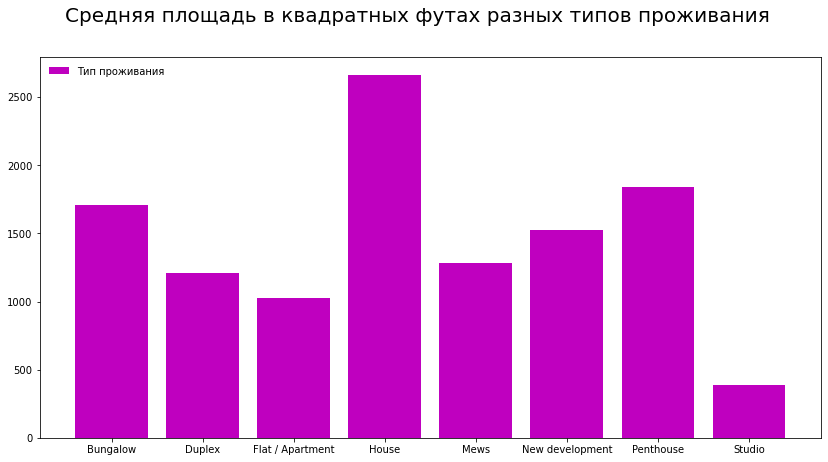

In [56]:
fig, ax = plt.subplots(figsize=(14,7))
ax.bar(houses_area_mean.index,houses_area_mean, color = 'm')
ax.legend(['Тип проживания'], frameon=False, loc=2)
fig.suptitle('Средняя площадь в квадратных футах разных типов проживания', fontsize=20)

Согласно графику, нибольшая средняя площадь у частных домов, а наименьшая - у студий.

Далее создам график рассеяния, на котором посторою зависисмость средней стоимости за место продивание и средней площади места проживания. Предварительно сгруппирую переменные "Плошадь в квадратных футах" и "Стоимость" по переменной "Тип проживания" и найду среднее.

In [57]:
houses_area_mean = houses.groupby('Тип проживания')['Площадь в квадратных футах'].mean()

In [58]:
houses_value_mean = houses.groupby('Тип проживания')['Стоимость'].mean()

Переменная "Идеальное место проживания" будет отвечать за цвет точки.

In [59]:
houses_ideal_max = houses.groupby('Тип проживания')['Идеальное место проживания'].max()

In [60]:
houses_date = pd.concat([houses_area_mean, houses_value_mean, houses_ideal_max], axis=1)

In [61]:
houses_date

,Площадь в квадратных футах,Стоимость,Идеальное место проживания
Тип проживания,,,
Bungalow,1711.000000,9.044444e+05,0
Duplex,1211.500000,9.100000e+05,0
Flat / Apartment,1027.313690,1.239112e+06,0
House,2659.356219,2.410133e+06,1
Mews,1280.500000,1.400000e+06,0
New development,1526.009804,2.187552e+06,1
Penthouse,1837.195122,3.080546e+06,0
Studio,390.571429,3.492857e+05,0


Text(0, 0.5, 'Стоимость')

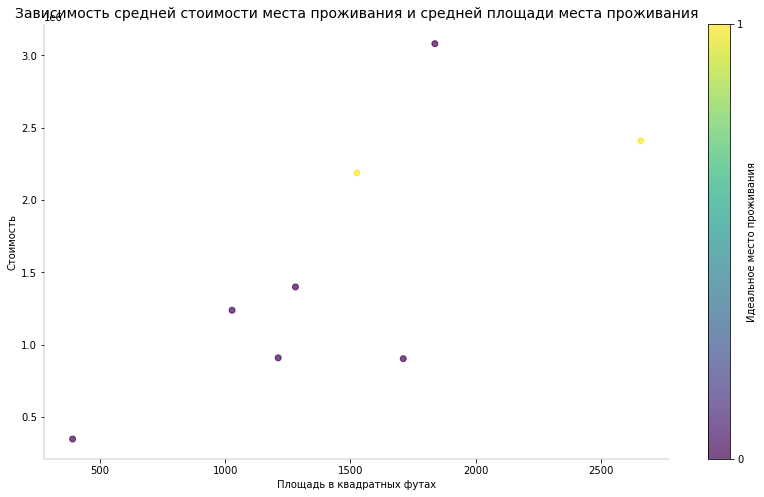

In [69]:
fig, ax = plt.subplots(figsize=(14,8))
graph = ax.scatter(houses_date['Площадь в квадратных футах'], houses_date['Стоимость'], 
           c = houses_date['Идеальное место проживания'], 
           alpha = 0.7)
plt.colorbar(graph, ticks=range(2), label='Идеальное место проживания')
ax.set_title('Зависимость средней стоимости места проживания и средней площади места проживания', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.2)
ax.spines['bottom'].set_linewidth(0.2)
ax.set_xlabel('Площадь в квадратных футах', fontsize=10)
ax.set_ylabel('Стоимость', fontsize=10)

Таким образом, согласно графику, чем больше средняя площадь места проживания, тем выше средняя стоимость за место проживания. Также можно сказать, что чем больше площадь и выше стоимость, тем скорее всего место проживание будет считаться идеальным местом для проживания.  